# Linear regression

## Short EDA on ads data

In [18]:
import pandas as pd

df = pd.read_csv("Advertising.csv", index_col=0)

In [ ]:
df.sample(5)
df.info()
df.head()
df.shape # 200 rows, 4 columns: 3 feature and 1 label

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


(200, 4)

- features/independent variable: TV, radio, newspaper

- label/target/dependent variable: sales

<Axes: xlabel='TV', ylabel='sales'>

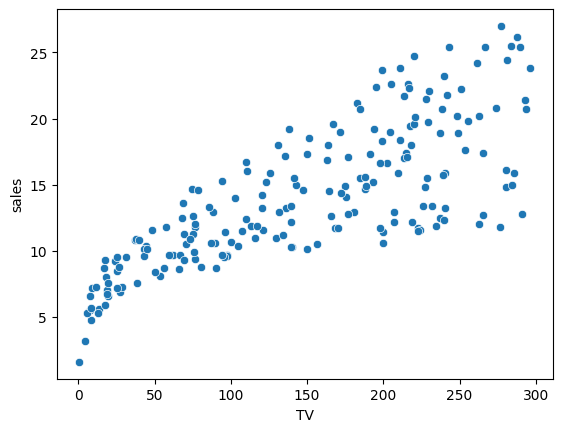

In [22]:
import seaborn as sns

sns.scatterplot(data = df, x="TV", y="sales")

[Text(0.5, 1.0, 'Newspaper spending vs sales')]

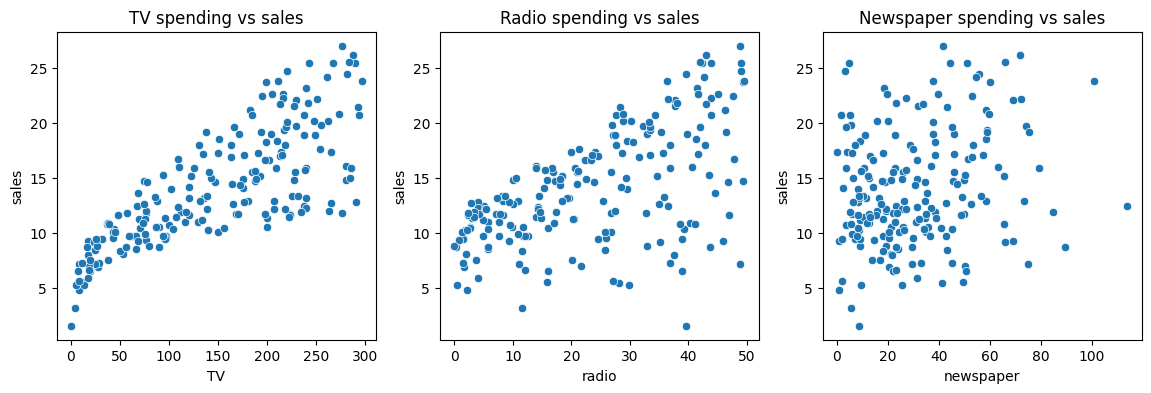

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(14,4))
sns.scatterplot(data = df, x = "TV", y="sales", ax = axes[0])
sns.scatterplot(data = df, x = "radio", y="sales", ax = axes[1])
sns.scatterplot(data = df, x = "newspaper", y="sales", ax = axes[2])

axes[0].set(title = "TV spending vs sales")
axes[1].set(title = "Radio spending vs sales")
axes[2].set(title = "Newspaper spending vs sales")